# Lecture 4 - Unsupervised Learning

Michael Mommert, 2023FS, Machine Learning (BBWL), University of St. Gallen

This notebook contains code to generate some of the visualizations presented in the lecture slides.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## k-means clustering

Create a data set of three clusters; the labels (`y`) are used as ground-truth to distinguish the data points that are were generated by the different clusters.

In [2]:
import numpy as np
from numpy.random import multivariate_normal, seed

n = 50 # sample size per cluster 

# set random seed
seed(42)

x = np.vstack(
    [multivariate_normal((0, 1), [[0.07, 0], [0, 0.07]], size=n),
     multivariate_normal((1, 1), [[0.07, 0], [0, 0.07]], size=n), 
     multivariate_normal((1, 0), [[0.07, 0], [0, 0.07]], size=n)])
y = np.array([0] * n + [1] * n + [2] * n)


plot ground-truth

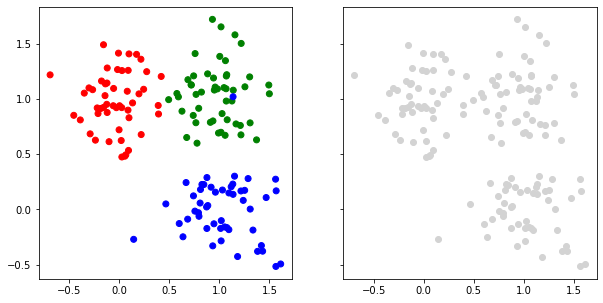

In [3]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
ax[1].scatter(x[:,0], x[:,1], color='lightgray')

#plt.savefig('setup.png', dpi=150)

0. pick `k` random data points as cluster centers

In [4]:
k = 3

center_ids = np.random.randint(low=0, high=len(x), size=3)


plot cluster centers

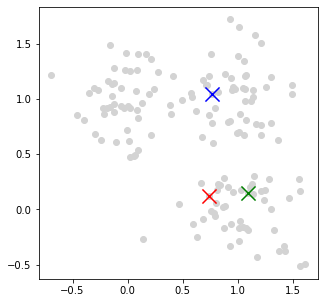

In [5]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = ['gray'] * len(x)

# plot all datapoints
ax.scatter(x[:,0], x[:,1], color='lightgray')

# indicate cluster centers
for i, c in enumerate(center_ids):
    ax.scatter(x[:,0][c], x[:,1][c], s=200, marker='x', color={0: 'red', 1: 'green', 2: 'blue'}[i])

plt.savefig('random_centers.png', dpi=150)

1. compute distances of all data points from all cluster centers and assign clusters

In [6]:
def compute_distances(x, cluster_centers):
    distances = []
    for cluster_center in cluster_centers:
        distances.append(np.sqrt((x[:,0] - cluster_center[0])**2 + (x[:,1] - cluster_center[1])**2))
    distances = np.dstack(distances)[0]

    # assign clusters based on distance
    clusters = np.argmin(distances, axis=1)
    return distances, clusters

dist, y_pred = compute_distances(x, x[center_ids])

plot cluster assignments

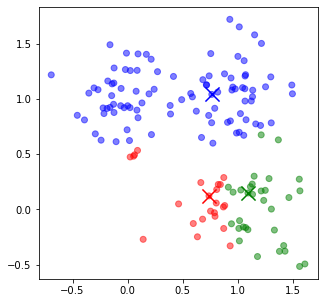

In [7]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = ['gray'] * len(x)

# plot all datapoints
ax.scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_pred], alpha=0.5)

# indicate cluster centers
for i, c in enumerate(center_ids):
    ax.scatter(x[:,0][c], x[:,1][c], s=200, marker='x', color={0: 'red', 1: 'green', 2: 'blue'}[i])

# plt.savefig('cluster_assignment.png', dpi=150)

2. update cluster centers

In [8]:
def update_cluster_centers(x, y_pred):
    k = len(set(y_pred))
    cluster_centers = []
    for i in range(k):
        cluster_centers.append((np.mean(x[y_pred == i, 0]),
                                np.mean(x[y_pred == i, 1])))
    return cluster_centers

cluster_centers = update_cluster_centers(x, y_pred)

repeat steps 1 and 2 until convergence

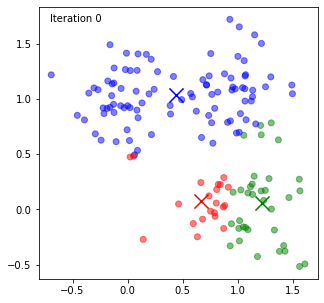

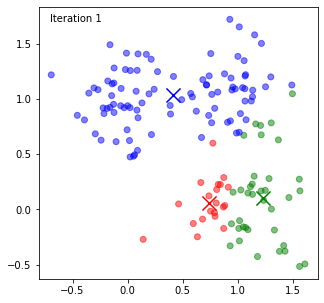

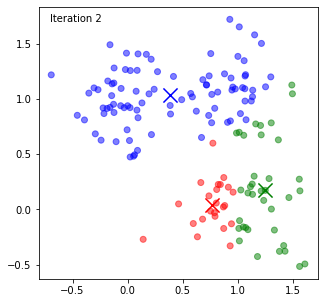

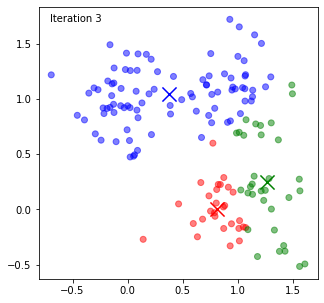

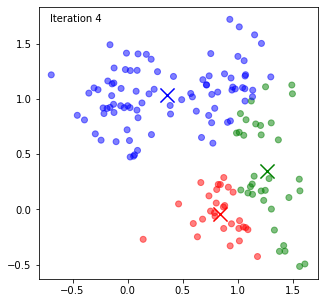

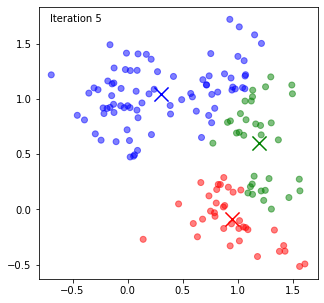

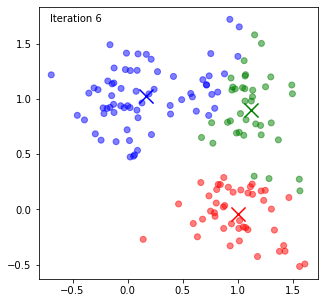

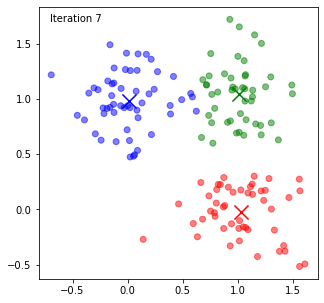

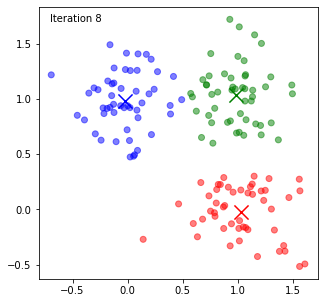

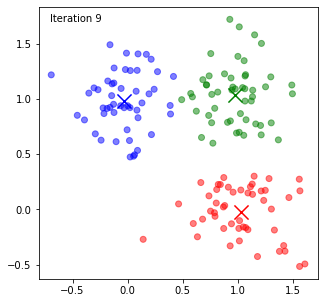

In [9]:
for i in range(10):
    dist, y_pred = compute_distances(x, cluster_centers)
    cluster_centers = update_cluster_centers(x, y_pred)

    # setup axis for plot
    f, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    # plot all datapoints
    ax.scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_pred], alpha=0.5)

    # mark cluster centers
    for j, c in enumerate(cluster_centers):
        ax.scatter(c[0], c[1], s=200, marker='x', color={0: 'red', 1: 'green', 2: 'blue'}[j])

    # add label to indicate iteration
    ax.annotate("Iteration {}".format(i), xy=(-0.7, 1.7))

    plt.savefig('kmeans_{:03d}.png'.format(i), dpi=150)


Compare final cluster assignment to ground truth labels.

Text(0.5, 1.0, '$k$-means clusters')

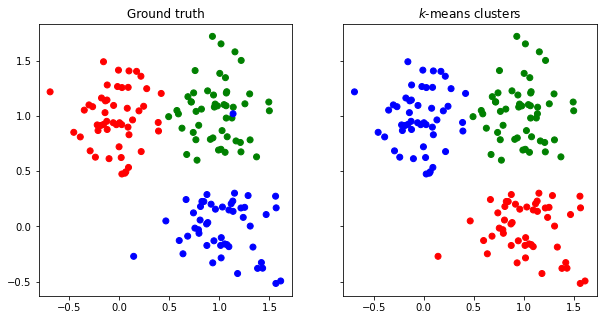

In [10]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
ax[1].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_pred])

ax[0].set_title('Ground truth')
ax[1].set_title(r'$k$-means clusters')

#plt.savefig('final_comparison.png', dpi=150)

Create a panel that shows outcomes for different values of $k$:

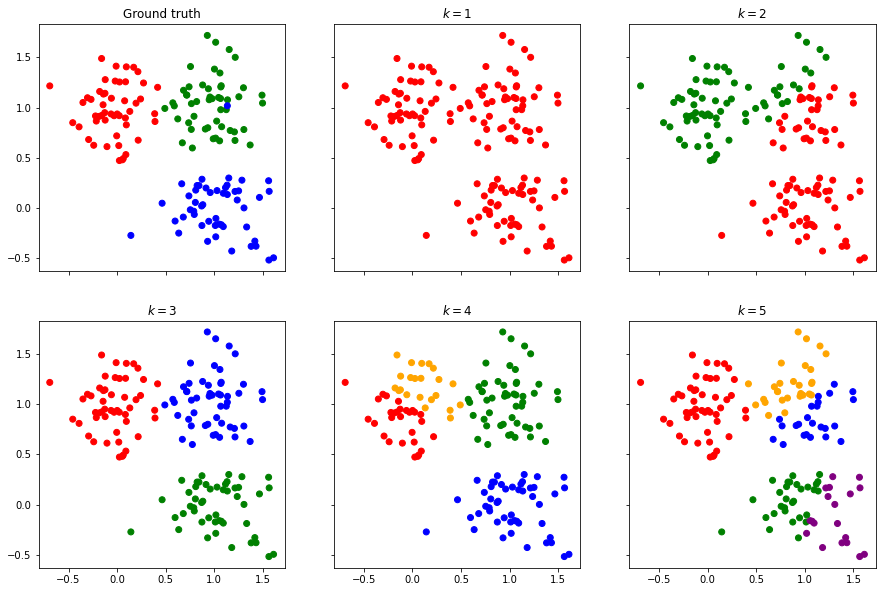

In [11]:
f, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 10))
ax = np.ravel(ax)

# ground truth
ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'purple'}[l] for l in y])
ax[0].set_title('Ground truth')

# run k-means and plot results
for k in range(1, 6):

    # step 0: random initialization
    cluster_centers = x[np.random.randint(low=0, high=len(x), size=k)]

    # run k-means: iterate between steps 1 and 2
    for i in range(10):
        dist, y_pred = compute_distances(x, cluster_centers)
        cluster_centers = update_cluster_centers(x, y_pred)
    
    # plot results    
    ax[k].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'purple'}[l] for l in y_pred])
    ax[k].set_title(r'$k={}$'.format(k))

#plt.savefig('kmeans_k_comparison.png', dpi=150)

test some weird data distributions:

Text(0.5, 1.0, '$k$-means clusters')

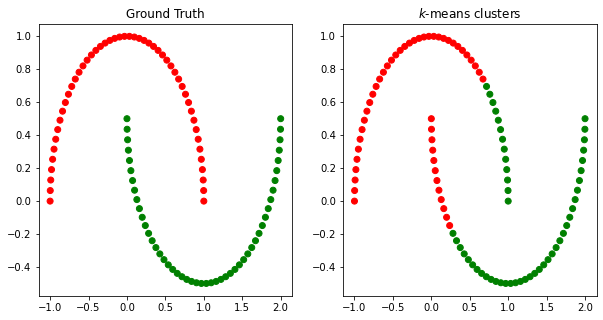

In [12]:
from sklearn.datasets import make_moons

k = 2

# generate data set
x, y = make_moons(n_samples=100)

f, ax = plt.subplots(1, 2, figsize=(10, 5))

# step 0: random initialization
cluster_centers = x[np.random.randint(low=0, high=len(x), size=k)]

# run k-means: iterate between steps 1 and 2
for i in range(10):
    dist, y_pred = compute_distances(x, cluster_centers)
    cluster_centers = update_cluster_centers(x, y_pred)
    
# plot results    
ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
ax[1].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_pred])
ax[0].set_title('Ground Truth')
ax[1].set_title(r'$k$-means clusters')

# plt.savefig('kmeans_moons.png', dpi=150)

Text(0.5, 1.0, '$k$-means clusters')

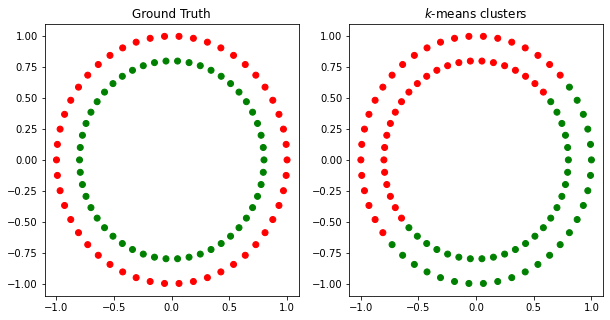

In [13]:
from sklearn.datasets import make_circles

k = 2

# generate data set
x, y = make_circles(n_samples=100)

f, ax = plt.subplots(1, 2, figsize=(10, 5))

# step 0: random initialization
cluster_centers = x[np.random.randint(low=0, high=len(x), size=k)]

# run k-means: iterate between steps 1 and 2
for i in range(10):
    dist, y_pred = compute_distances(x, cluster_centers)
    cluster_centers = update_cluster_centers(x, y_pred)
    
# plot results    
ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
ax[1].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_pred])
ax[0].set_title('Ground Truth')
ax[1].set_title(r'$k$-means clusters')

# plt.savefig('kmeans_circles.png', dpi=150)

simulate an unscaled data set

Text(0.5, 1.0, '$k$-means clusters')

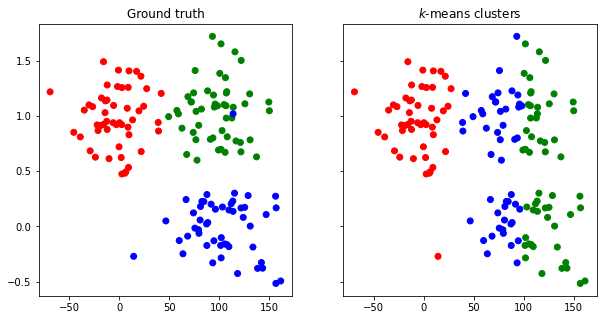

In [14]:
n = 50 # sample size per cluster 
k = 3
# set random seed
seed(42)

x = np.vstack(
    [multivariate_normal((0, 1), [[0.07, 0], [0, 0.07]], size=n),
     multivariate_normal((1, 1), [[0.07, 0], [0, 0.07]], size=n), 
     multivariate_normal((1, 0), [[0.07, 0], [0, 0.07]], size=n)])
x *= [100, 1]
y = np.array([0] * n + [1] * n + [2] * n)


# step 0: random initialization
cluster_centers = x[np.random.randint(low=0, high=len(x), size=k)]

# run k-means: iterate between steps 1 and 2
for i in range(10):
    dist, y_pred = compute_distances(x, cluster_centers)
    cluster_centers = update_cluster_centers(x, y_pred)

# plot results
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
ax[1].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_pred])

ax[0].set_title('Ground truth')
ax[1].set_title(r'$k$-means clusters')

# plt.savefig('kmeans_unscaled.png', dpi=150)

Text(0.5, 1.0, '$k$-means clusters')

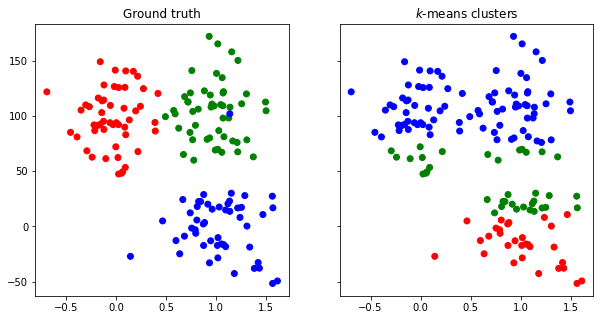

In [15]:
n = 50 # sample size per cluster 
k = 3
# set random seed
seed(42)

x = np.vstack(
    [multivariate_normal((0, 1), [[0.07, 0], [0, 0.07]], size=n),
     multivariate_normal((1, 1), [[0.07, 0], [0, 0.07]], size=n), 
     multivariate_normal((1, 0), [[0.07, 0], [0, 0.07]], size=n)])
x *= [1, 100]
y = np.array([0] * n + [1] * n + [2] * n)


# step 0: random initialization
cluster_centers = x[np.random.randint(low=0, high=len(x), size=k)]

# run k-means: iterate between steps 1 and 2
for i in range(10):
    dist, y_pred = compute_distances(x, cluster_centers)
    cluster_centers = update_cluster_centers(x, y_pred)

# plot results
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
ax[1].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y_pred])

ax[0].set_title('Ground truth')
ax[1].set_title(r'$k$-means clusters')

# plt.savefig('kmeans_unscaled2.png', dpi=150)

## Agglomerative Clustering

In [39]:
seed(42)

x = np.vstack(
    [multivariate_normal((0, 1), [[0.07, 0], [0, 0.07]], size=n),
     multivariate_normal((1, 1), [[0.07, 0], [0, 0.07]], size=n), 
     multivariate_normal((1, 0), [[0.07, 0], [0, 0.07]], size=n)])
y = np.array([0] * n + [1] * n + [2] * n)

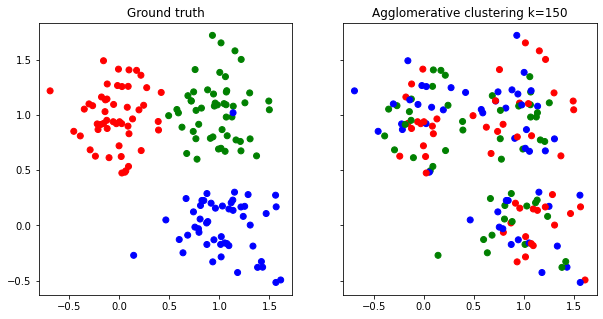

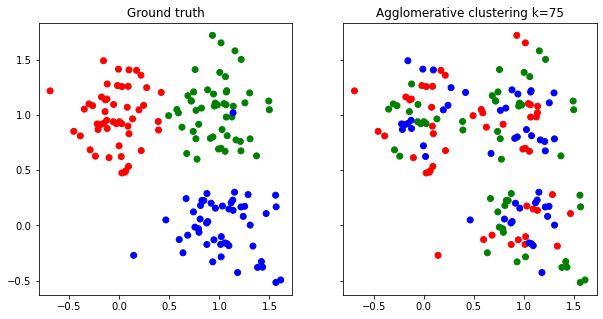

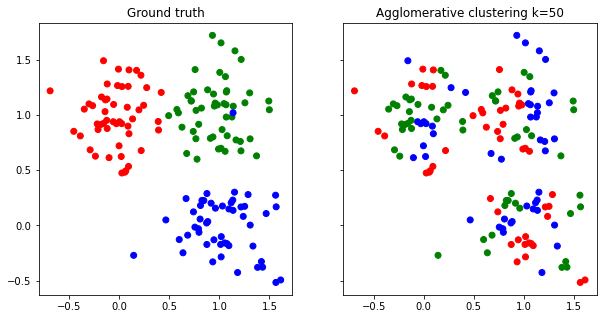

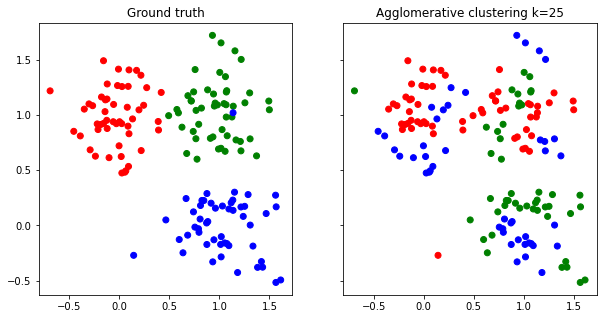

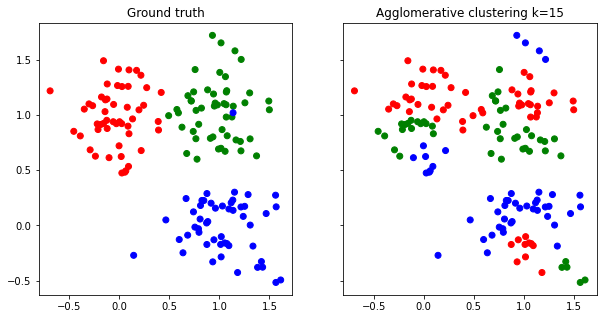

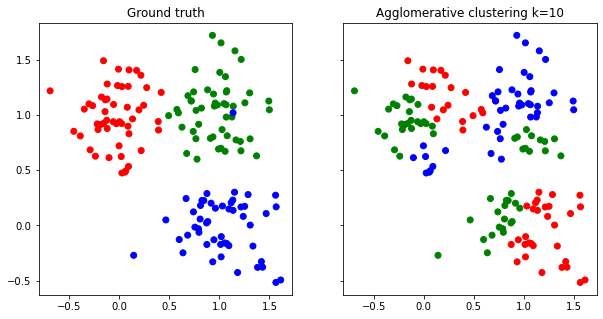

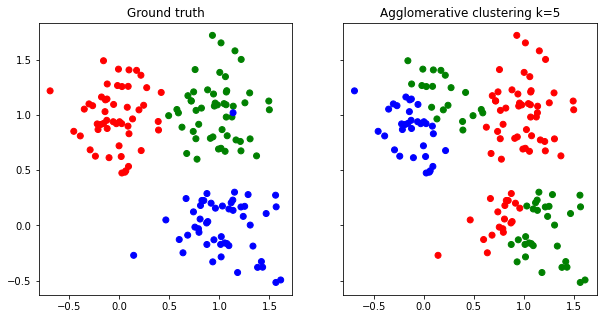

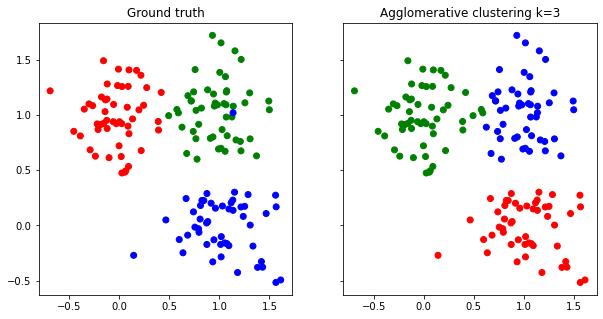

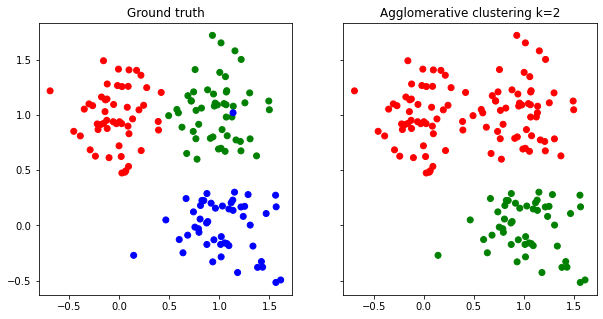

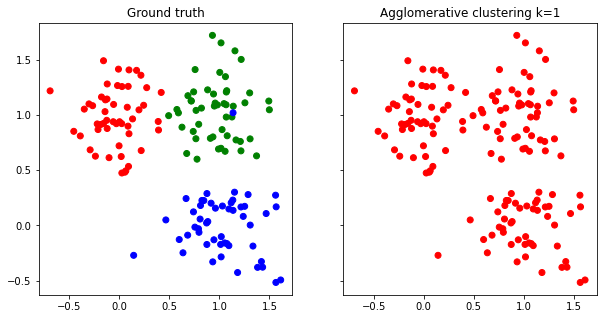

In [51]:
from sklearn.cluster import AgglomerativeClustering

for k in [150, 75, 50, 25, 15, 10, 5, 3, 2, 1]:

    model = AgglomerativeClustering(n_clusters=k)
    y_pred = model.fit_predict(x)

    # plot results
    f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
    ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
    ax[1].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[int(l % 3)] for l in y_pred])

    ax[0].set_title('Ground truth')
    ax[1].set_title(r'Agglomerative clustering k={}'.format(k))

    plt.savefig('agg_clust_{:03d}.png'.format(k), dpi=150)


## DBSCAN

In [55]:
seed(42)

x = np.vstack(
    [multivariate_normal((0, 1), [[0.07, 0], [0, 0.07]], size=n),
     multivariate_normal((1, 1), [[0.07, 0], [0, 0.07]], size=n), 
     multivariate_normal((1, 0), [[0.07, 0], [0, 0.07]], size=n)])
y = np.array([0] * n + [1] * n + [2] * n)

number of clusters found: 3


Text(0.5, 1.0, 'DBSCAN clustering eps=0.200, n=4')

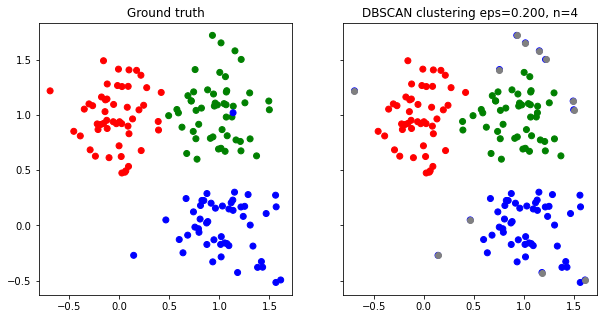

In [92]:
eps = 0.2
n = 4

model = DBSCAN(eps=eps, min_samples=n)
y_pred = model.fit_predict(x)

print('number of clusters found:', max(y_pred)+1)

# plot results
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
ax[1].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[int(l % 3)] for l in y_pred])
ax[1].scatter(x[y_pred == -1][:,0], x[y_pred == -1][:,1], color='grey')

ax[0].set_title('Ground truth')
ax[1].set_title(r'DBSCAN clustering eps={:.3f}, n={:d}'.format(eps, n))
#plt.savefig('dbscan_clust_{:.3f}, n={:03d}.png'.format(eps, n), dpi=150)

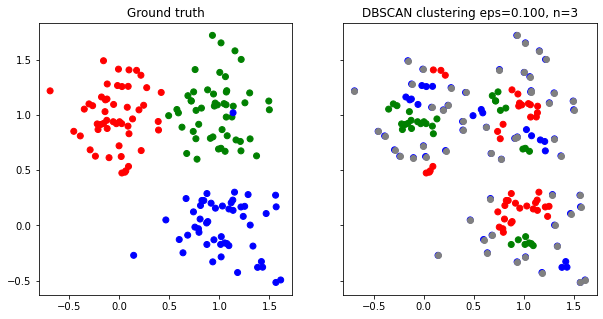

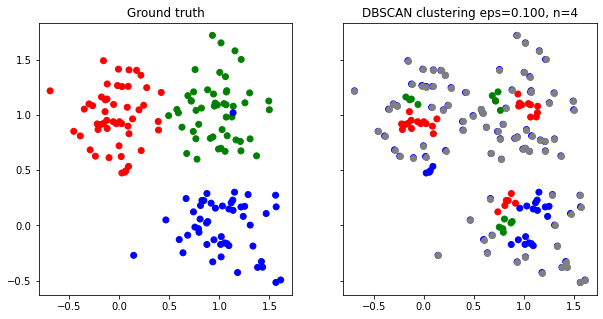

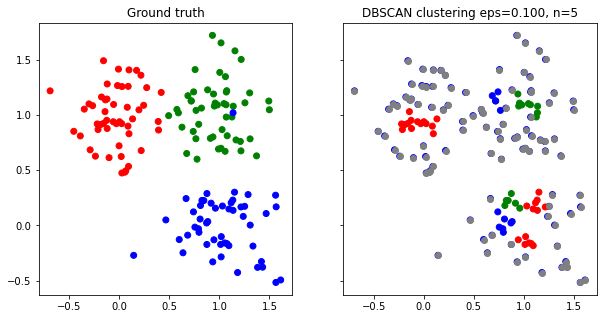

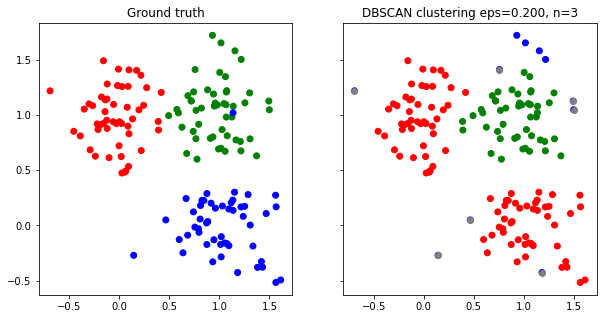

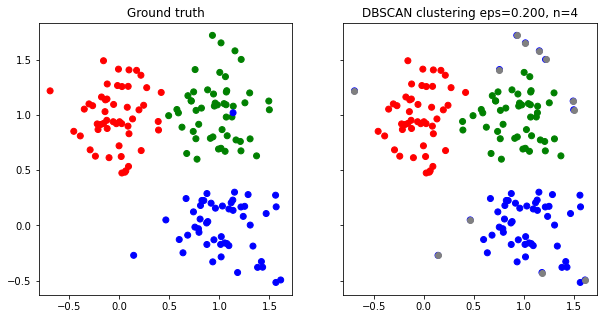

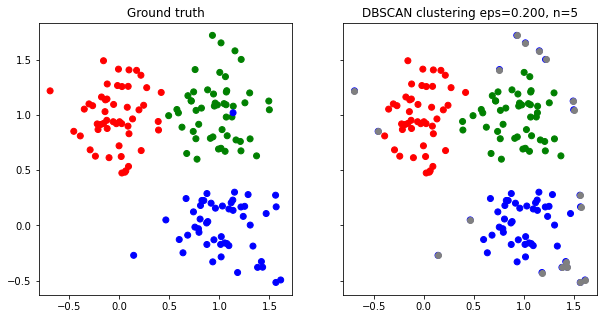

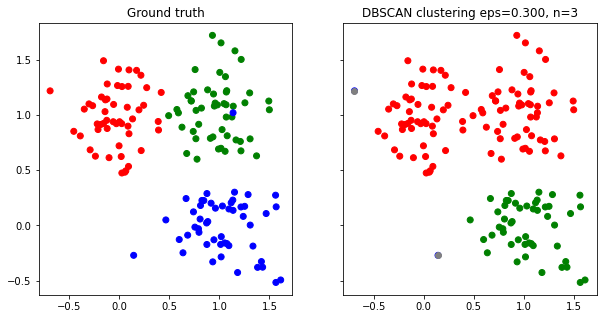

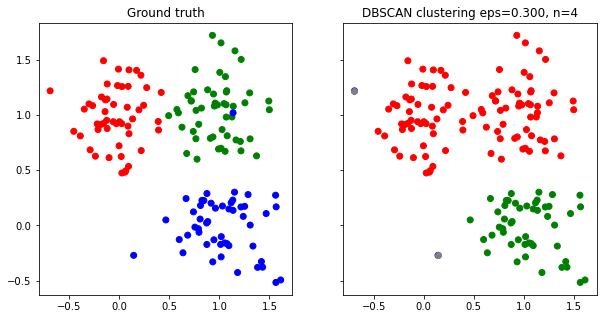

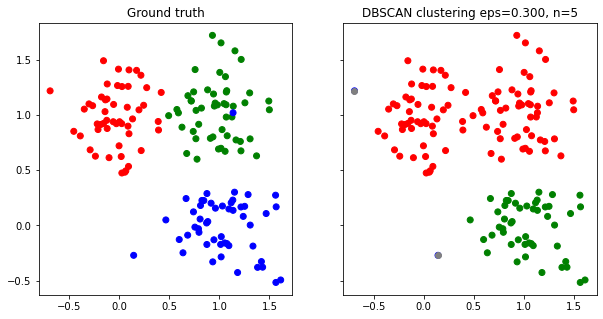

In [89]:
from sklearn.cluster import DBSCAN

for eps in [0.1, 0.2, 0.3]:
    for n in [3, 4, 5]:

        model = DBSCAN(eps=eps, min_samples=n)
        y_pred = model.fit_predict(x)

        # plot results
        f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
        ax[0].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[l] for l in y])
        ax[1].scatter(x[:,0], x[:,1], color=[{0: 'red', 1: 'green', 2: 'blue'}[int(l % 3)] for l in y_pred])
        ax[1].scatter(x[y_pred == -1][:,0], x[y_pred == -1][:,1], color='grey')

        ax[0].set_title('Ground truth')
        ax[1].set_title(r'DBSCAN clustering eps={:.3f}, n={:d}'.format(eps, n))

        plt.savefig('dbscan_clust_{:.3f}, n={:03d}.png'.format(eps, n), dpi=150)

## Principal Components Analysis

We load a 10-dimensional data set:

In [157]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

diabetes = load_diabetes()

data = scaler.fit_transform(diabetes.data)  # with data scaling
#data = diabetes.data * np.array([1, 1, 2, 5, 1, 3, 2, 1, 5, 2])+ np.arange(10) # simulate in-scaled data

We create a plot with the first feature on the x-axis and all other features on the y-axis:

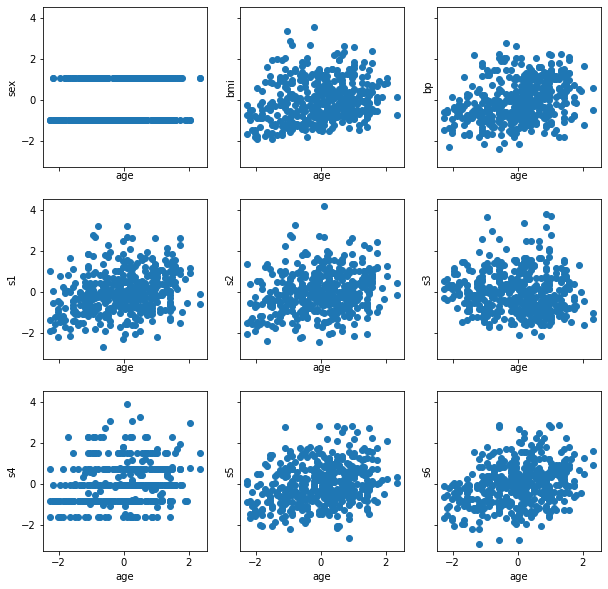

In [158]:
f, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10))
ax = np.ravel(ax)

for i in range(9):
    ax[i].scatter(data[:,0], data[:,i+1])
    ax[i].set_xlabel(diabetes.feature_names[0])
    ax[i].set_ylabel(diabetes.feature_names[i+1]) 

plt.savefig('pca_data.png', dpi=150)


perform a PCA to find 10 principal components

In [159]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca.fit(data)

PCA(n_components=10)

The principal component vectors expressed in the ten original dimensions:

In [160]:
pca.components_

array([[ 0.21643101,  0.18696711,  0.3031625 ,  0.2717397 ,  0.34325493,
         0.35186062, -0.28243639,  0.42883325,  0.37861731,  0.32218282],
       [ 0.04437151, -0.38654811, -0.15628061, -0.13825564,  0.57302669,
         0.45593985,  0.50624287, -0.06818423, -0.0261893 , -0.0849466 ],
       [ 0.49466811, -0.10685833,  0.1675317 ,  0.51356804, -0.0685867 ,
        -0.26969438,  0.38602787, -0.38068121,  0.0636315 ,  0.27684271],
       [-0.4140095 , -0.67986052,  0.49982533, -0.01966734, -0.06839533,
        -0.16777384, -0.07602005,  0.0079212 ,  0.26442742,  0.08708624],
       [-0.68686389,  0.37345612,  0.12935936,  0.48689014,  0.12917415,
         0.11673143,  0.24499115, -0.14364377, -0.1516611 ,  0.03138792],
       [-0.2258505 ,  0.04173103, -0.4031419 , -0.27276274,  0.00540864,
        -0.1332572 ,  0.1063716 , -0.0339454 ,  0.17873005,  0.80506447],
       [-0.10953821, -0.06760551, -0.51985787,  0.32064908,  0.07364908,
        -0.23054011, -0.00753445,  0.07123619

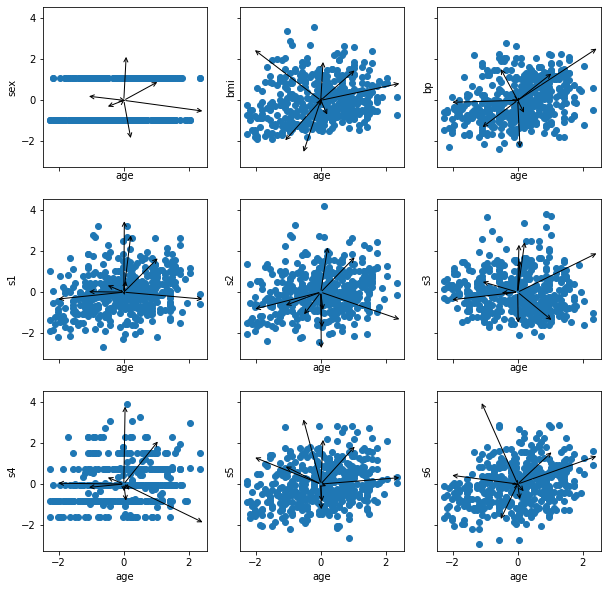

In [162]:
f, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10))
ax = np.ravel(ax)

for i in range(9):
    ax[i].scatter(data[:,0], data[:,i+1])
    ax[i].set_xlabel(diabetes.feature_names[0])
    ax[i].set_ylabel(diabetes.feature_names[i+1])
    for p in range(10):
        ax[i].annotate("", xy=(pca.components_[p][0]*5, pca.components_[p][i+1]*5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))

    plt.savefig('pca_data_all.png', dpi=150)

How many principal components are useful? Let's have a look at the explained variance for the different components:

In [163]:
pca.explained_variance_ratio_

array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192, 0.05365605, 0.04336832, 0.00783199, 0.00085605])

In [164]:
np.cumsum(pca.explained_variance_ratio_)

array([0.40242142, 0.55165324, 0.67224947, 0.76779711, 0.83401567,
       0.89428759, 0.94794364, 0.99131196, 0.99914395, 1.        ])

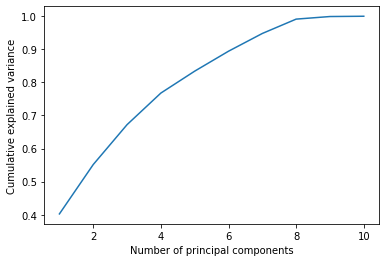

In [165]:
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')

plt.savefig('pca_explained_variance.png', dpi=150)

We choose the first 5 principal components, which can explain more than 83% of the observed variance.

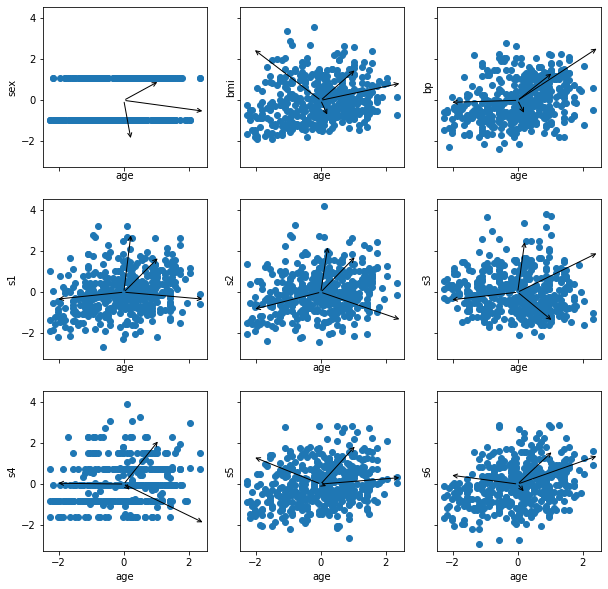

In [169]:
f, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10))
ax = np.ravel(ax)

for i in range(9):
    ax[i].scatter(data[:,0], data[:,i+1])
    ax[i].set_xlabel(diabetes.feature_names[0])
    ax[i].set_ylabel(diabetes.feature_names[i+1])
    for p in range(5):
        ax[i].annotate("", xy=(pca.components_[p][0]*5, pca.components_[p][i+1]*5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))

    plt.savefig('pca_data_first5.png', dpi=150)

Let's see how much the individual original features contribute to the first three principal components:

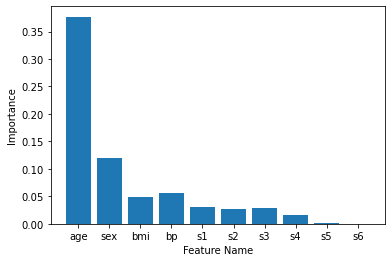

In [184]:
feature_imps = np.zeros(10)

for i in range(10):
    feature_imps[i] = np.sum(pca.components_[:5,i]**2) * pca.explained_variance_ratio_[i]

plt.bar(diabetes.feature_names, feature_imps)
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.savefig('pca_feature_importances.png', dpi=150)